# KONFIGURASI

- https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a
- https://medium.com/@awantikdas/a-comprehensive-naive-bayes-tutorial-using-scikit-learn-f6b71ae84431
- https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

## IMPORT MODUL AWAL

In [1]:
# data
import pandas as pd
import numpy as np

# buat ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

# grafik
import matplotlib.pyplot as plt

## BACA DATASET

In [2]:
# baca data excel

data = pd.read_excel('import_data_awal.xlsx')  
data.head()

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan,hasil
0,20-40,wanita,ya,ya,ya,ya,ya,tidak,ya,ya
1,40-50,wanita,tidak,ya,tidak,tidak,ya,ya,tidak,tidak
2,20-40,pria,tidak,tidak,ya,tidak,ya,tidak,ya,tidak
3,50-60,wanita,ya,tidak,ya,ya,tidak,ya,ya,ya
4,40-50,pria,ya,ya,tidak,ya,ya,ya,tidak,ya


In [3]:
# mengecek anomali pada isi data (unique data setiap kolom) = tidak ada penyimpangan

print('NILAI SETIAP pclass')

for pclass in data:
    print('\n---------------\n'+pclass+'\n---------------')
    value = data[pclass].unique()
    index = 1
    for child_val in value:
        print(str(index)+'. '+str(child_val))
        index+=1

NILAI SETIAP pclass

---------------
usia
---------------
1. 20-40
2. 40-50
3. 50-60

---------------
jkel
---------------
1. wanita
2. pria

---------------
banyak_kencing
---------------
1. ya
2. tidak

---------------
turun_bb
---------------
1. ya
2. tidak

---------------
luka_sukar
---------------
1. ya
2. tidak

---------------
kesemutan
---------------
1. ya
2. tidak

---------------
lemas
---------------
1. ya
2. tidak

---------------
kulit_gatal
---------------
1. tidak
2. ya

---------------
keturunan
---------------
1. ya
2. tidak

---------------
hasil
---------------
1. ya
2. tidak


## KONVERSI NILAI STRING KE DISKRIT (ANGKA)

In [4]:
# digunakan untuk mengkonversi nilai string ke bentuk diskrit untuk klasifikasi -> misal ya, tidak -> 1,0

# params : data, mode
# data -> ngambil data awal
# mode (default : full) -> apakah diubah semua atau tidak
# mode full -> ubah ke angka untuk training
# mode selain full -> ubah ke angka untuk deteksi

def to_diskrit(data,mode='full'):
    # mengubah usia -> 20-40 = 0, 40-50 = 1, 50-60 = 2
    data.loc[data['usia'] == '20-40', 'usia'] = 0
    data.loc[data['usia'] == '40-50', 'usia'] = 1
    data.loc[data['usia'] == '50-60', 'usia'] = 2

    # mengubah jenis kelamin -> pria = 1, wanita = 0
    data.loc[data['jkel'] == 'pria', 'jkel'] = 1
    data.loc[data['jkel'] == 'wanita', 'jkel'] = 0

    # mengubah banyak kencing -> ya = 1, tidak = 0
    data.loc[data['banyak_kencing'] == 'ya', 'banyak_kencing'] = 1
    data.loc[data['banyak_kencing'] == 'tidak', 'banyak_kencing'] = 0

    # mengubah turun bb -> ya = 1, tidak = 0
    data.loc[data['turun_bb'] == 'ya', 'turun_bb'] = 1
    data.loc[data['turun_bb'] == 'tidak', 'turun_bb'] = 0

    # mengubah luka sukar -> ya = 1, tidak = 0
    data.loc[data['luka_sukar'] == 'ya', 'luka_sukar'] = 1
    data.loc[data['luka_sukar'] == 'tidak', 'luka_sukar'] = 0

    # mengubah kesemutan -> ya = 1, tidak = 0
    data.loc[data['kesemutan'] == 'ya', 'kesemutan'] = 1
    data.loc[data['kesemutan'] == 'tidak', 'kesemutan'] = 0

    # mengubah lemas -> ya = 1, tidak = 0
    data.loc[data['lemas'] == 'ya', 'lemas'] = 1
    data.loc[data['lemas'] == 'tidak', 'lemas'] = 0

    # mengubah kulit_gatal -> ya = 1, tidak = 0
    data.loc[data['kulit_gatal'] == 'ya', 'kulit_gatal'] = 1
    data.loc[data['kulit_gatal'] == 'tidak', 'kulit_gatal'] = 0

    # mengubah keturunan -> ya = 1, tidak = 0
    data.loc[data['keturunan'] == 'ya', 'keturunan'] = 1
    data.loc[data['keturunan'] == 'tidak', 'keturunan'] = 0
    
    if(mode=='full'):
    
        # mengubah hasil -> ya = 1, tidak = 0
        data.loc[data['hasil'] == 'ya', 'hasil'] = 1
        data.loc[data['hasil'] == 'tidak', 'hasil'] = 0
        
        return data
    
    return data


In [5]:
# overview hasil konversi data

data = to_diskrit(data)
data.head()

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan,hasil
0,0,0,1,1,1,1,1,0,1,1
1,1,0,0,1,0,0,1,1,0,0
2,0,1,0,0,1,0,1,0,1,0
3,2,0,1,0,1,1,0,1,1,1
4,1,1,1,1,0,1,1,1,0,1


## MENGECEK MISSING VALUE / OUTLIERS

In [6]:
# mengecek nilai null pada dataset
cek_anomali = data.isnull().sum()
cek_anomali

usia              0
jkel              0
banyak_kencing    0
turun_bb          0
luka_sukar        0
kesemutan         0
lemas             0
kulit_gatal       0
keturunan         0
hasil             0
dtype: int64

## MEMISAHKAN X dan y untuk klasifikasi

### MEMISAHKAN KELAS "y"

In [7]:
# menghapus kolom hasil dan menampilkannya = kelas y
y = data.pop('hasil')
y.head()

0    1
1    0
2    0
3    1
4    1
Name: hasil, dtype: int64

### MEMISAHKAN KELAS "X"

In [8]:
# kelas X = df data - kolom hasil
X = data
X.head()

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan
0,0,0,1,1,1,1,1,0,1
1,1,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,1,0,1
3,2,0,1,0,1,1,0,1,1
4,1,1,1,1,0,1,1,1,0


# UJI MODEL NAIVE BAYES

## Pembuatan model klasifikasi

In [9]:
# import MultinomialNB dari sklearn module
# alpha = 1 -> laplacian smoothing

model = MultinomialNB(alpha=1.0)

test_size = 0.2
# test size = sampel data dari populasi yang akan digunakan untuk melakukan prediksi terhadap data baru
# 0.2 = 20% dari populasi, misal 1000 data -> 200 data akan digunakan sebagai data training 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_size, random_state = 44)
# membagi data training set kedalam dataset training dan testing
# dataset training -> set data yang akan digunakan untuk pembelajaran oleh komputer
# dataset testing -> set / kumpulan data yang akan digunakan sebagai acuan prediksi data baru

# X_train -> berisikan data gejala (usia, jkel, keturunan, dll) untuk proses training
# X_test -> berisikan data gejala untuk memprediksi

# y_train -> kumpulan hasil aktual untuk proses training
# y_test -> kumpulan hasil aktual untuk memprediksi



In [10]:
X_train.head()
# nomor pada row acak = mengambil random set data untuk dibagi antara x_train dan x_test

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan
79,0,0,1,0,1,1,0,1,1
38,0,0,1,1,0,0,1,0,1
5,0,1,1,0,0,0,0,1,1
69,0,0,0,1,0,1,0,1,0
46,0,0,1,1,0,1,0,0,0


In [11]:
X_test.head()

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan
42,1,0,0,1,1,0,1,0,0
54,0,1,1,0,1,0,1,1,1
27,0,0,1,0,1,0,1,0,0
93,1,1,1,0,1,1,0,0,0
39,2,0,0,0,1,1,0,1,1


In [12]:
y_train.head()

79    1
38    1
5     0
69    0
46    0
Name: hasil, dtype: int64

In [13]:
y_test.head()

42    0
54    1
27    0
93    0
39    1
Name: hasil, dtype: int64

In [14]:
# melakukan training pada data

model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# y_pred = dataset hasil klasifikasi dari dataset testing -> digunakan untuk melihat kinerja naive bayes

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## Kinerja Klasifikasi

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  6],
       [ 0, 10]], dtype=int64)

In [17]:
# melihat akurasi dari penggunaan data training dan testing untuk memprediksi data baru

accuracy_score(y_test, y_pred)

0.7

In [18]:
# mencetak hasil klasifikasi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.62      1.00      0.77        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20



In [19]:
# test kinerja klasifikasi dengan naive bayes berdasarkan test size

def model_performance(test_size, params='all'):
    
    # setting awal training & testing set sesuai test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_size, random_state = 44)
    
    # inisiasi model dengan data training
    model.fit(X_train,y_train)
    
    # mengecek performa dengan y_pred -> confusion matrix, classification report dari prediksi X_test
    y_pred = model.predict(X_test)
    
    
    heading = str(test_size*100)+'%'
    print('\n')
    print('<--------------------- Sample test size '+heading+' --------------------->')
    
    if params == 'all' or params == 'accuracy':
        print('\n')
        print('Akurasi')
        print('======================')
        accuracy = accuracy_score(y_test, y_pred)
        print(str(round(accuracy*100,2))+'%')
            
    if params == 'all' or params == 'confusion_matrix':
        print('\n')
        print('Confusion Matrix')
        print('======================')
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        
    if params == 'all' or params == 'classification_report':
        print('\n')
        print('Classification Report')
        print('======================')
        print(classification_report(y_test, y_pred))
        

In [20]:
# analisa hasil penggunaan test size dengan mengambil nilai akurasi & performa klasifikasi dari ukuran test size

# cetak hasil performa klasifikasi dengan sampel datasize 10% - 90%
def print_performance(params = 'all'):
    for i in range(1,10):
            value = round(i*0.1 ,1)
            # value = 0.1, 0.2, 0.3, ...., 0.9
            model_performance(value,params)
        
print_performance('all')



<--------------------- Sample test size 10.0% --------------------->


Akurasi
40.0%


Confusion Matrix
[[1 6]
 [0 3]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.33      1.00      0.50         3

    accuracy                           0.40        10
   macro avg       0.67      0.57      0.38        10
weighted avg       0.80      0.40      0.33        10



<--------------------- Sample test size 20.0% --------------------->


Akurasi
70.0%


Confusion Matrix
[[ 4  6]
 [ 0 10]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.62      1.00      0.77        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20



<--------------------- Sample test size 30.0% ----

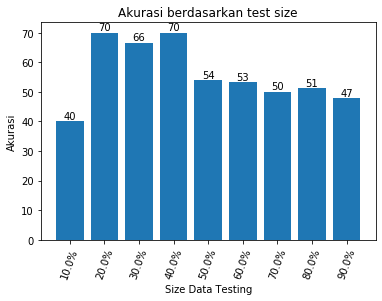

In [21]:
data_test_size = []
data_akurasi = []
for i in range(1,10):
    test_size = round(i*0.1 ,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_size, random_state = 44)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    data_akurasi.append(round(accuracy*100,2))
    data_test_size.append(str(round(test_size*100,2))+'%')
    

plot = plt.bar(data_test_size, data_akurasi)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.title("Akurasi berdasarkan test size")
plt.xlabel("Size Data Testing")
plt.ylabel("Akurasi")
plt.xticks(rotation=70)
# Display the graph on the screen
plt.show()

## PEMBUATAN MODEL KLASIFIKASI

## Penentuan model yang digunakan & training data

In [22]:
# alpha 1 -> laplacian smoothing
model = MultinomialNB(alpha=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state = 44)

# training data
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Membaca data yang akan digunakan untuk prediksi

In [23]:
# baca data gejala dari excel
data_deteksi = pd.read_excel('deteksi_gejala.xlsx',header=0)

data_deteksi

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan
0,50-60,wanita,ya,tidak,tidak,ya,ya,ya,ya
1,20-40,wanita,tidak,tidak,tidak,tidak,tidak,ya,tidak
2,40-50,wanita,tidak,ya,ya,tidak,ya,tidak,ya
3,20-40,wanita,tidak,tidak,tidak,tidak,tidak,tidak,tidak
4,20-40,pria,tidak,tidak,ya,tidak,ya,tidak,ya
5,20-40,pria,ya,ya,ya,ya,tidak,tidak,ya
6,40-50,pria,ya,ya,ya,ya,ya,tidak,tidak
7,40-50,pria,tidak,ya,ya,tidak,ya,tidak,tidak
8,50-60,pria,tidak,ya,ya,ya,tidak,tidak,ya
9,50-60,wanita,ya,tidak,tidak,ya,tidak,ya,tidak


In [24]:
# data awal deteksi -> data gejala yang digunakan untuk kebutuhan print output

data_awal_deteksi = data_deteksi.copy()

In [25]:
# data deteksi -> data deteksi yang digunakan untuk klasifikasi
# data dikonversi menjadi bentuk diskrit

to_diskrit(data_deteksi,'partial')
data_deteksi.head()

,usia,jkel,banyak_kencing,turun_bb,luka_sukar,kesemutan,lemas,kulit_gatal,keturunan
0,2,0,1,0,0,1,1,1,1
1,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,0,1
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,1


# PROSES KLASIFIKASI

## Konfigurasi Output

In [26]:
# membuat function untuk mengembalikan dataframe testing baris ke-index -> kebutuhan klasifikasi dari set gejala

# tabulate -> library untuk print bentuk tabel seperti oracle
from tabulate import tabulate

# mengembalikan data gejala index ke-x yang ingin diprediksi
def get_testing_value(index):
    return data_deteksi.loc[[index],:]

# print data gejala index ke-x yang ingin diprediksi (dalam bentuk tabel gejala)
def print_gejala(index):
    df = data_awal_deteksi.loc[[index],:]
    pdtabulate=lambda df:tabulate(df,headers='keys',tablefmt='psql')
    print(pdtabulate(df))

## Test Prediksi pada data gejala

In [27]:
# uji coba deteksi dari data deteksi index ke-2

new_predicted = model.predict(get_testing_value(2))
new_predicted

array([1], dtype=int64)

## Prediksi dinamis sesuai data ke-x

In [28]:
# melakukan prediksi pada data gejala index ke-x lalu mencetak gejala dan hasilnya

def predict_diabetes(index):
    X_test = get_testing_value(index)
    result = model.predict(X_test)
    print_gejala(index)
    hasil = 'TIDAK TERDETEKSI DIABETES'
    
    # jika hasil = 1 -> terdeteksi
    if(result[0] == 1):
        hasil = '\x1b[31mTERDETEKSI DIABETES\x1b[0m'
        
    print('HASIL : '+hasil)
    print()
    print('\n')

## Prediksi pada semua data gejala

In [29]:
# looping untuk mencetak semua data gejala yang diinputkan (sumber : dataframe yang diimport dari file excel gejala)

for i in range(len(data_deteksi)):
    predict_diabetes(i)

+----+--------+--------+------------------+------------+--------------+-------------+---------+---------------+-------------+
|    | usia   | jkel   | banyak_kencing   | turun_bb   | luka_sukar   | kesemutan   | lemas   | kulit_gatal   | keturunan   |
|----+--------+--------+------------------+------------+--------------+-------------+---------+---------------+-------------|
|  0 | 50-60  | wanita | ya               | tidak      | tidak        | ya          | ya      | ya            | ya          |
+----+--------+--------+------------------+------------+--------------+-------------+---------+---------------+-------------+
HASIL : TERDETEKSI DIABETES



+----+--------+--------+------------------+------------+--------------+-------------+---------+---------------+-------------+
|    | usia   | jkel   | banyak_kencing   | turun_bb   | luka_sukar   | kesemutan   | lemas   | kulit_gatal   | keturunan   |
|----+--------+--------+------------------+------------+--------------+-------------+--